# RNN

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


**Get the data**

In [2]:
dataset_train = pd.read_csv('5_Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_test = pd.read_csv('5_Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

** Feature Scaling ** 

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

** Creating a data structure with 60 timesteps and 1 output **

In [6]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

** Building the RNN ** 
* Initialising the RNN
* first LSTM layer
* second LSTM layer
* third LSTM layer
* output layer

In [8]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

**Fitting the RNN**

In [9]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0446
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0053
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0047
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0043
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0040
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/step - lo

1198/1198 [==============================] - 4s 3ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0013


** Making the predictions **

In [10]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

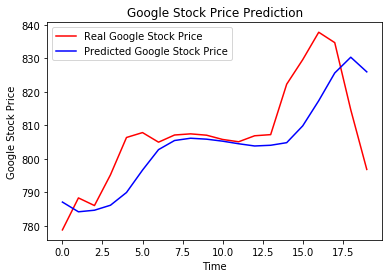

In [11]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

In [12]:
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

12.01244822948535
